In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
import os, glob, pickle
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [49]:
from sklearn.model_selection import GridSearchCV
import warnings
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=41)
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) 
# defining parameter range
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = model, param_grid = param_grid,cv = 3, n_jobs = -1)


 
# fitting the model for grid search
grid.fit(x_train, y_train)
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)








Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy : 0.9018492176386914


In [50]:
##Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
#Accuracy : 0.9198672356567094

In [51]:
#Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 90, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
#Accuracy : 0.9189189189189189

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#x_test = lda.transform(x_test)

In [59]:
model = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth=90,min_samples_leaf=3,min_samples_split=12)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [61]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=12)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
y_pred=model.predict(x_test)

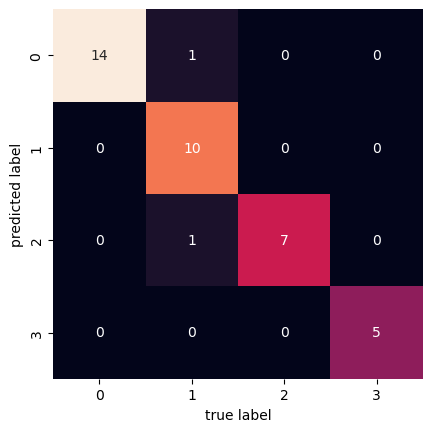

In [63]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.83      0.91        12
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00         5

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38



In [65]:

accuracy_score(y_pred,y_test)

0.9473684210526315

In [66]:
#training and validation accuracy

In [69]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 90.667 (4.667)


In [71]:
#testing Accuracy
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.83      0.91        12
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00         5

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38



In [75]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


def cross_validation(model,x,y, cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }




result = cross_validation(model, x_train,y_train, 5)
print(result)

{'Training Accuracy scores': array([0.93258427, 0.93258427, 0.93333333, 0.93333333, 0.91111111]), 'Validation Accuracy scores': array([0.86956522, 0.91304348, 0.81818182, 0.86363636, 1.        ]), 'Training Precision scores': array([0.93526868, 0.93479021, 0.93587952, 0.93369131, 0.91381119]), 'Validation Precision scores': array([0.88690476, 0.91666667, 0.8452381 , 0.86428571, 1.        ]), 'Training Recall scores': array([0.94      , 0.94      , 0.94153846, 0.93910256, 0.92192308]), 'Validation Recall scores': array([0.88690476, 0.92261905, 0.8125    , 0.88095238, 1.        ]), 'Training F1 scores': array([0.93632374, 0.93573656, 0.93747217, 0.9346775 , 0.91546443]), 'Validation F1 scores': array([0.87791375, 0.91258741, 0.82326007, 0.86832612, 1.        ]), 'Mean Training Accuracy': 92.85892634207242, 'Mean Validation Accuracy': 89.28853754940711, 'Mean Training Precision': 0.9306881810028262, 'Mean Validation Precision': 0.9026190476190475, 'Mean Training Recall': 0.936512820512820

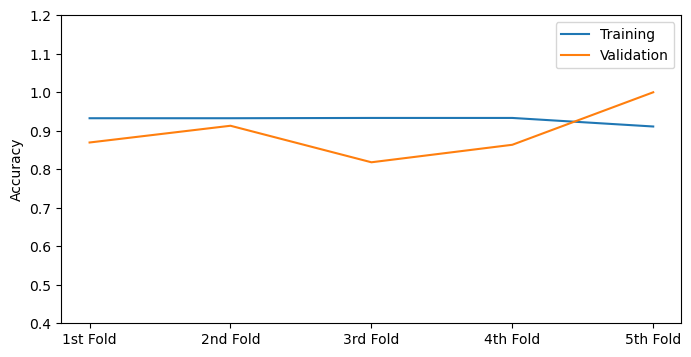

In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(result["Training Accuracy scores"])
plt.plot(result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

In [74]:
#y_pred=grid.predict(x_test)
#print(classification_report(y_test,y_pred))

In [4]:
import numpy as np
def plot_result(x_label, y_label, plot_title, train_data, val_data):
               
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.2, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

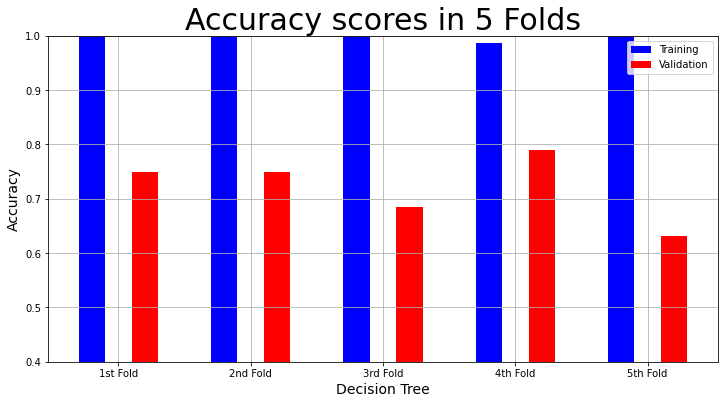

In [5]:
# Plot Accuracy Result
from matplotlib import pyplot as plt
%matplotlib inline
model_name = "Random Forest"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            result["Training Accuracy scores"],
            result["Validation Accuracy scores"])